In [1]:
# Load the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv("POMO_dataset/Historical Weather Data 2010-2021_preprocessed_2.csv")
df.head(2)

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,NewLabel
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,6.91,7.18,1709.0,0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,6.77,7.66,1707.0,1,1,1,0,0,0,24


In [3]:
df.columns

Index(['observation', 'date', 'month', 'year', 'tempC_7to8', 'tempC_1to2',
       'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8',
       'Relative humidity_1to2', 'Relative humidity_6to7',
       'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2',
       'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8',
       'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8',
       'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)',
       'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7',
       'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 'soil_pH',
       'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)',
       'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose',
       'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora',
       'NewLabel'],
      dtype='object')

In [4]:
col_list = ['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
            'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']

In [5]:
# function's
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# evaluate a regression model
def evaluate_regression_model(y, yhat):
    '''
    To evaluate regression model by using Mean Squared Error, 
    Root Mean Squared Error, Mean Absolute Error and R^2 Score.
    '''
    try:
        import math
        from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    except Exception as e:
        print(f"Exception [evaluate_regression_model] : {e} ")    
    Mean_Squared_Error = round(mean_squared_error(y, yhat), 2)
    Root_Mean_Squared_Error = round(math.sqrt(mean_squared_error(y, yhat)), 2)
    Mean_Absolute_Error = round(mean_absolute_error(y, yhat), 2)
    R2Score = round(r2_score(y, yhat), 2)
    print(f"Mean Squared Error : {Mean_Squared_Error} ")
    print(f"Root Mean Squared Error : {Root_Mean_Squared_Error} ")
    print(f"Mean Absolute Error : {Mean_Absolute_Error} ")
    print(f"R^2 Score : {R2Score} ")
    return {"Mean_Squared_Error" : Mean_Squared_Error, 
            "Root_Mean_Squared_Error" : Root_Mean_Squared_Error, 
            "Mean_Absolute_Error" : Mean_Absolute_Error, 
            "R2Score" : R2Score}

# evaluate_regression_model(y, yhat)

col_name : tempC_avg(0C) 



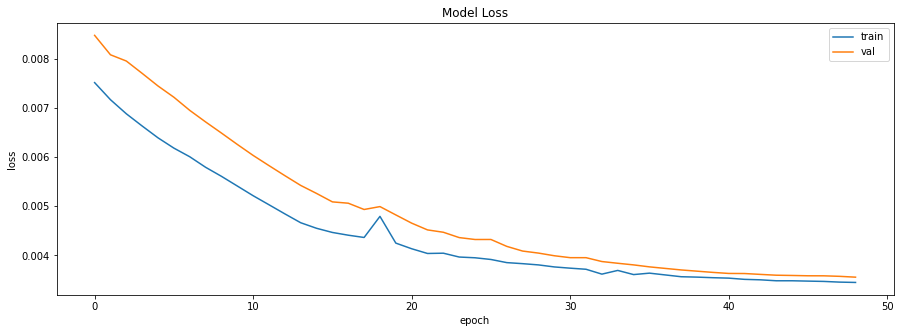

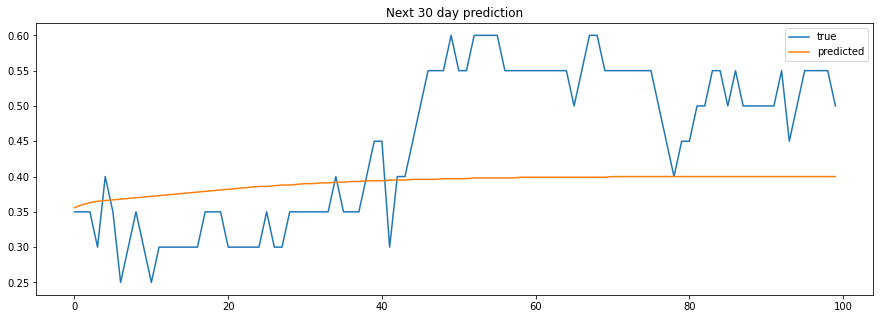

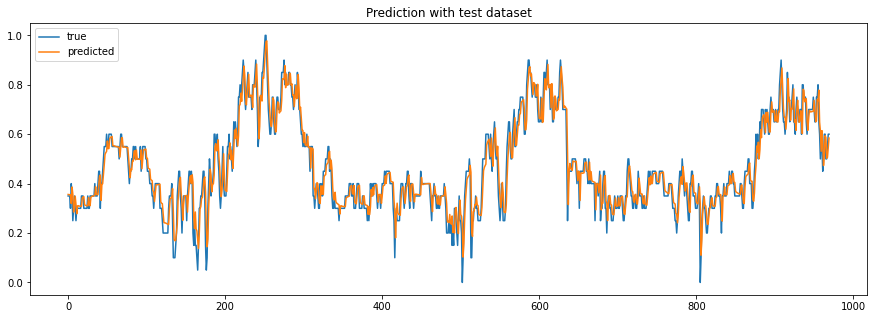

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.06 
Mean Absolute Error : 0.04 
R^2 Score : 0.89 


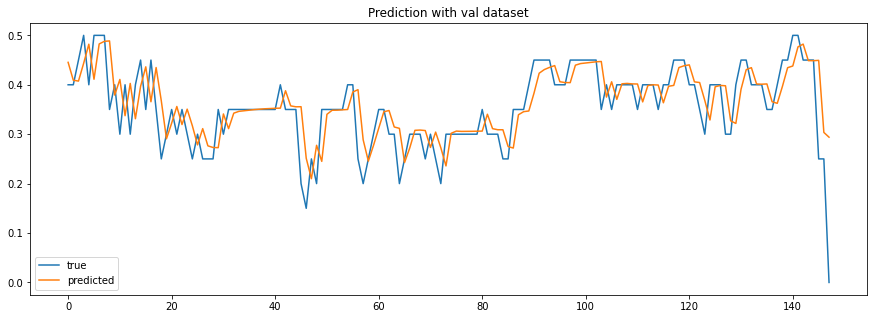

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.06 
Mean Absolute Error : 0.04 
R^2 Score : 0.48 
col_name : Relative humidity_avg(%) 



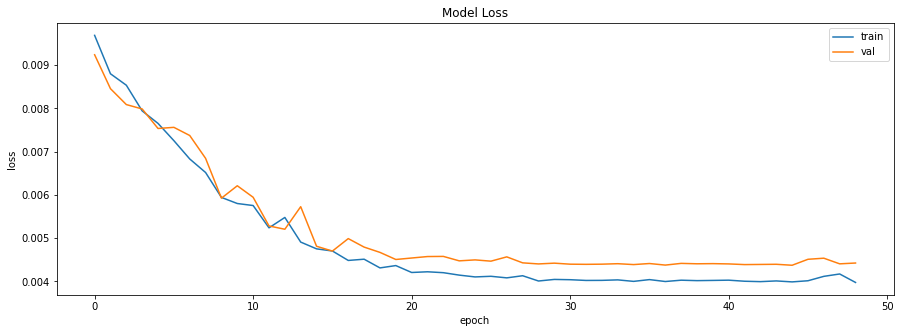

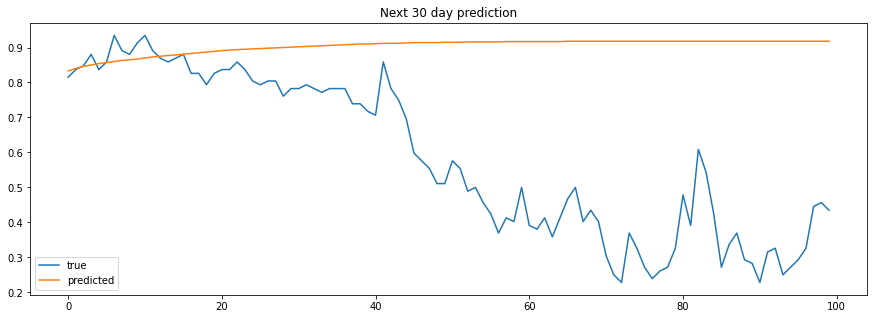

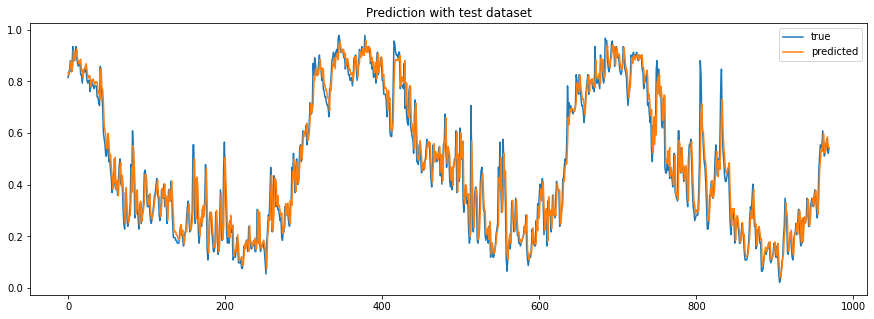

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.07 
Mean Absolute Error : 0.05 
R^2 Score : 0.94 


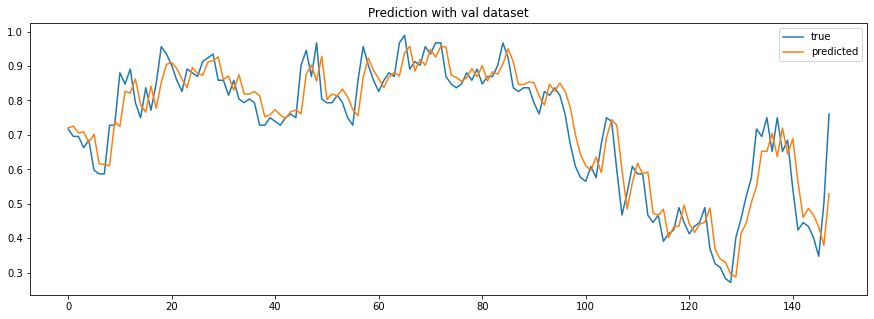

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.06 
Mean Absolute Error : 0.05 
R^2 Score : 0.87 
col_name : windspeedKmph_avg(Km/h) 



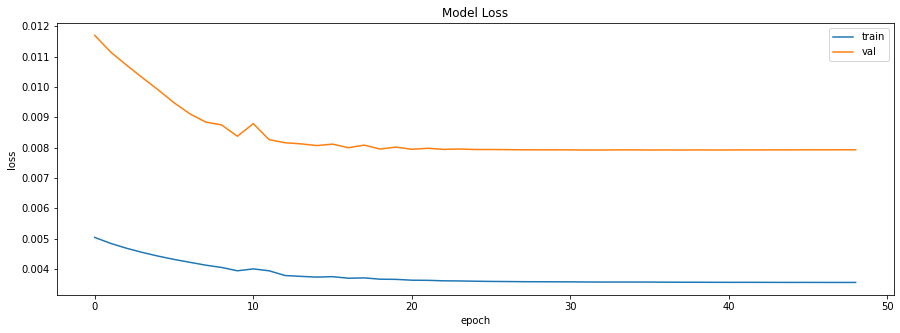

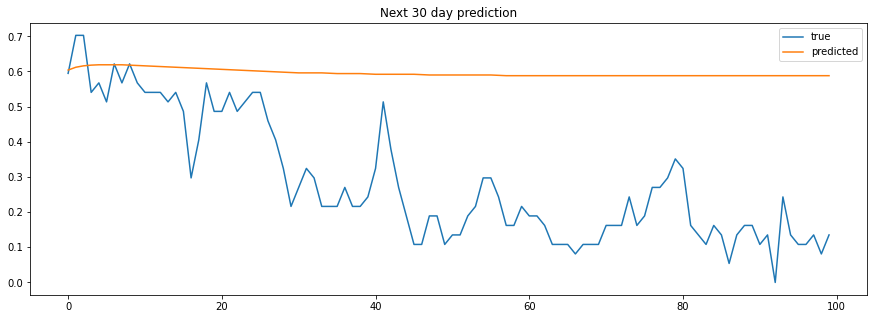

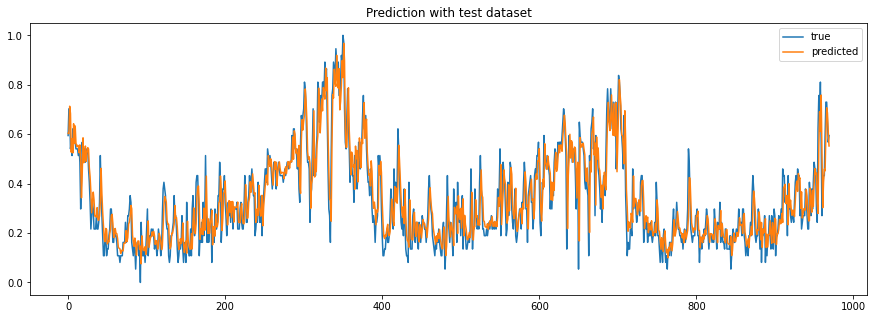

Mean Squared Error : 0.01 
Root Mean Squared Error : 0.09 
Mean Absolute Error : 0.07 
R^2 Score : 0.76 


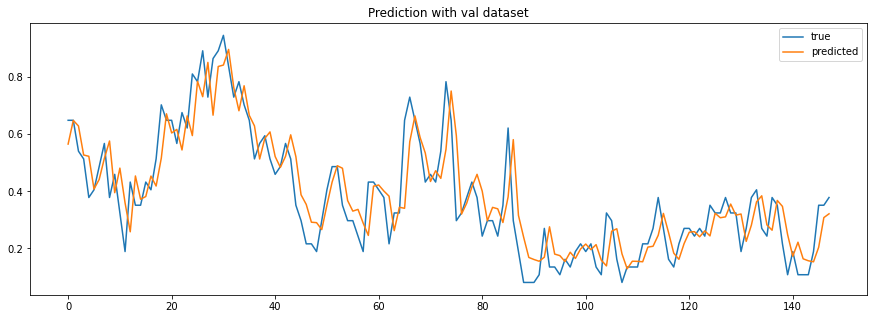

Mean Squared Error : 0.01 
Root Mean Squared Error : 0.1 
Mean Absolute Error : 0.08 
R^2 Score : 0.76 
col_name : pressureMB_avg 



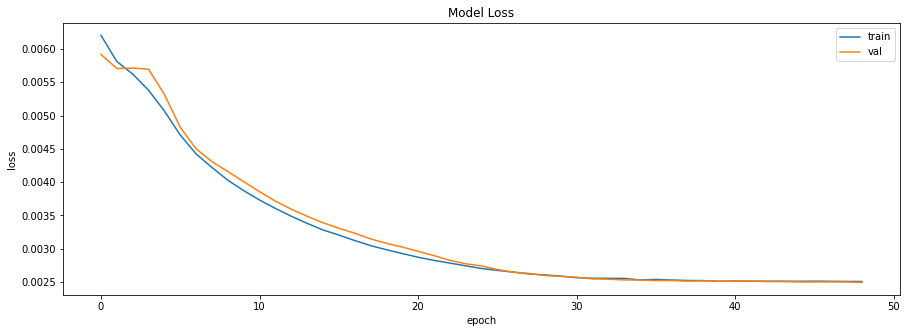

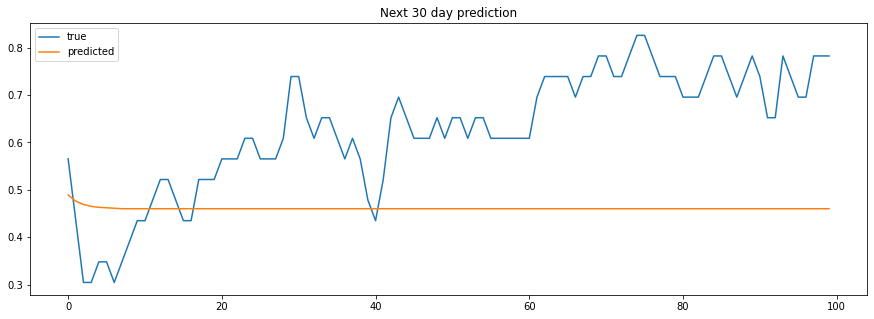

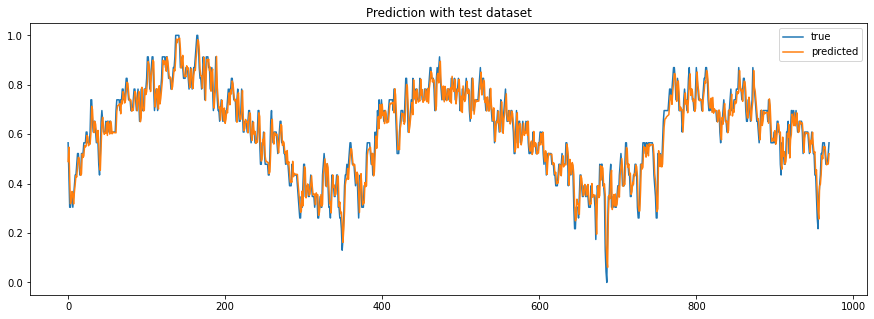

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.05 
Mean Absolute Error : 0.04 
R^2 Score : 0.92 


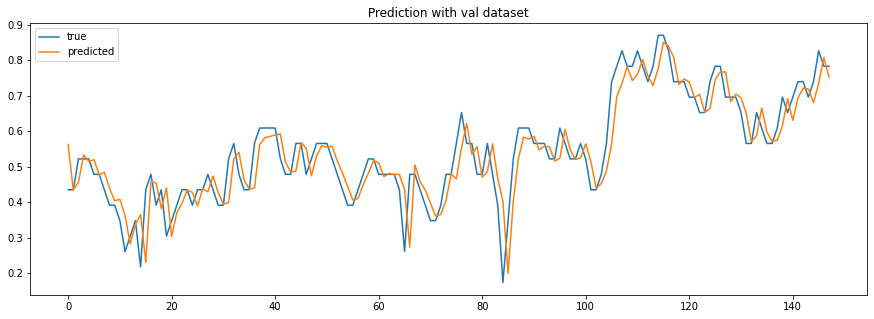

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.06 
Mean Absolute Error : 0.05 
R^2 Score : 0.8 
col_name : precipMM_avg(mm) 



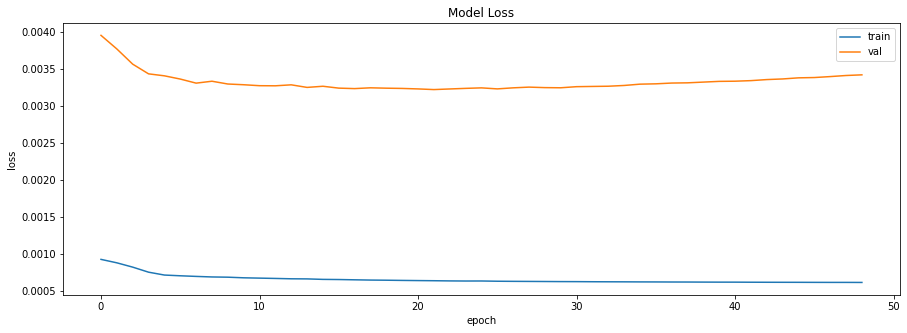

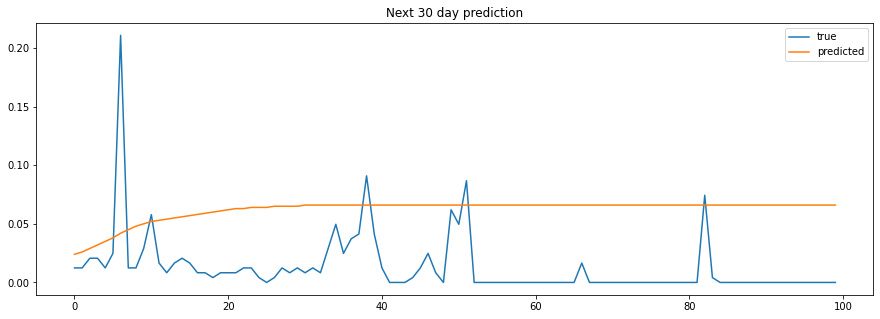

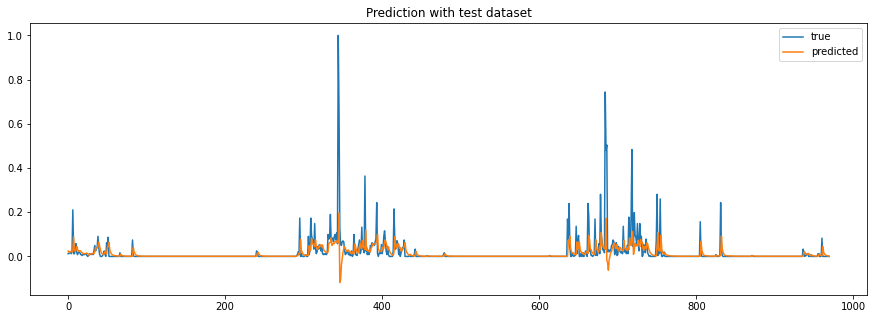

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.06 
Mean Absolute Error : 0.02 
R^2 Score : 0.17 


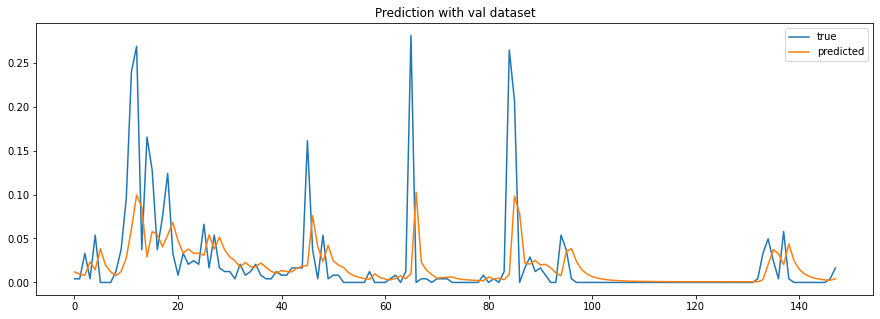

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.05 
Mean Absolute Error : 0.02 
R^2 Score : 0.18 
col_name : weatherDesc 



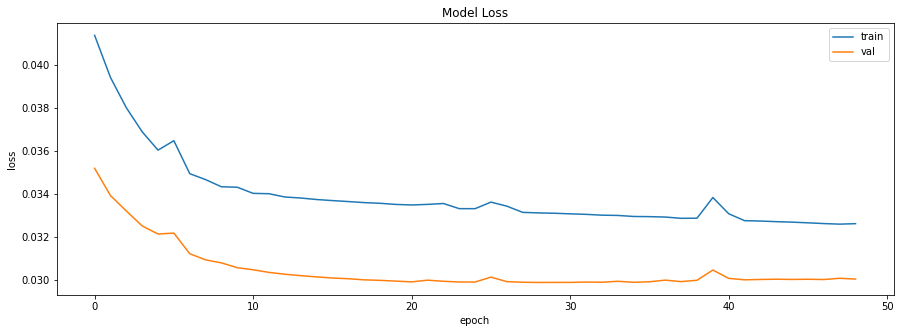

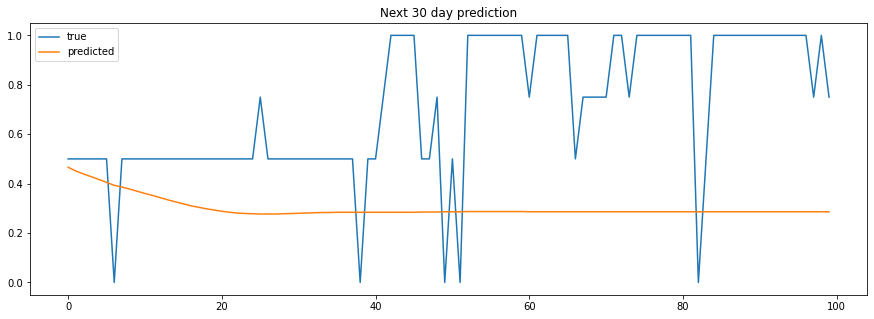

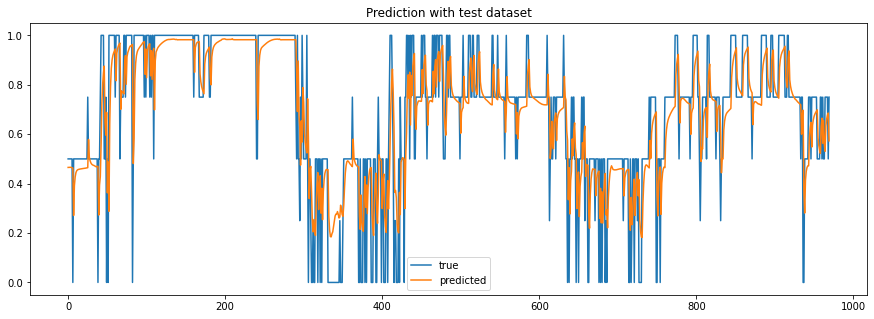

Mean Squared Error : 0.03 
Root Mean Squared Error : 0.17 
Mean Absolute Error : 0.12 
R^2 Score : 0.64 


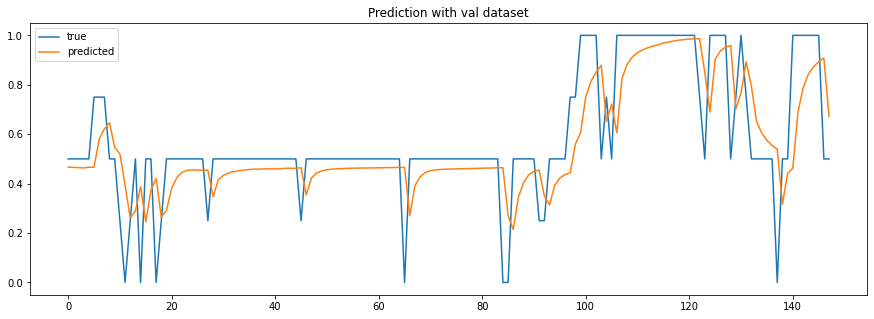

Mean Squared Error : 0.03 
Root Mean Squared Error : 0.17 
Mean Absolute Error : 0.12 
R^2 Score : 0.52 
col_name : Sunshine Hours 



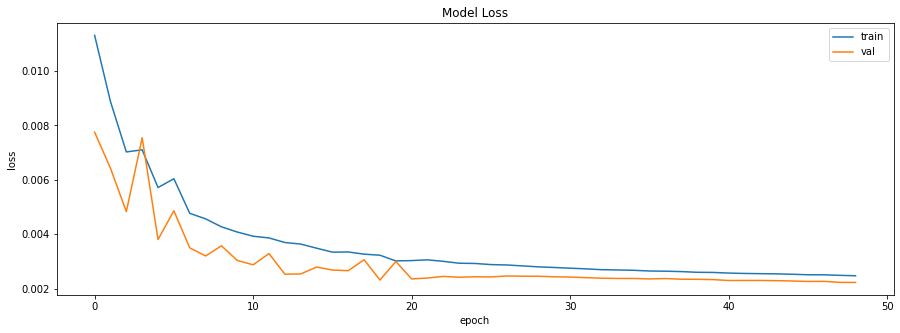

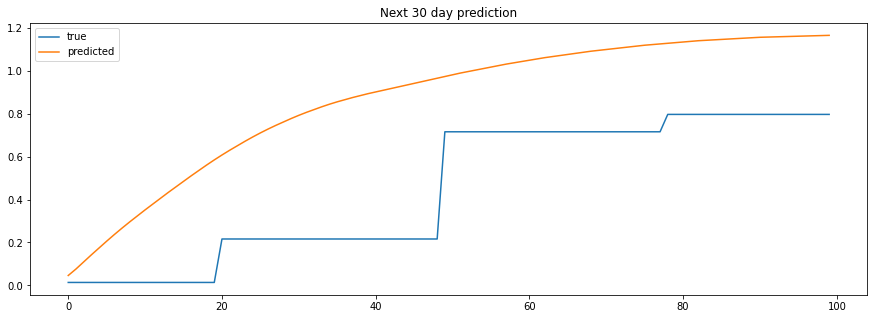

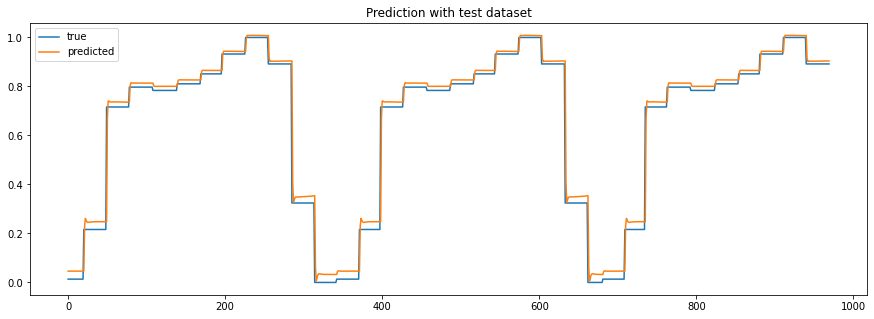

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.05 
Mean Absolute Error : 0.02 
R^2 Score : 0.98 


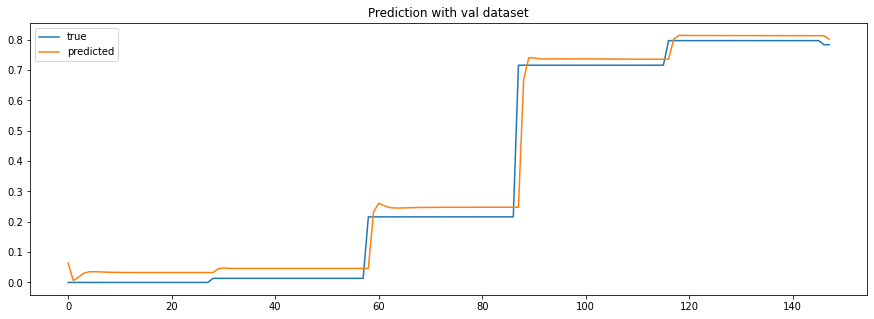

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.05 
Mean Absolute Error : 0.03 
R^2 Score : 0.98 
col_name : %_soil_moisure 



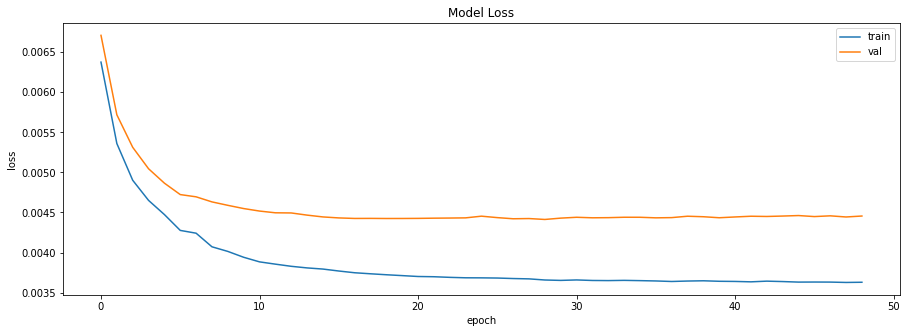

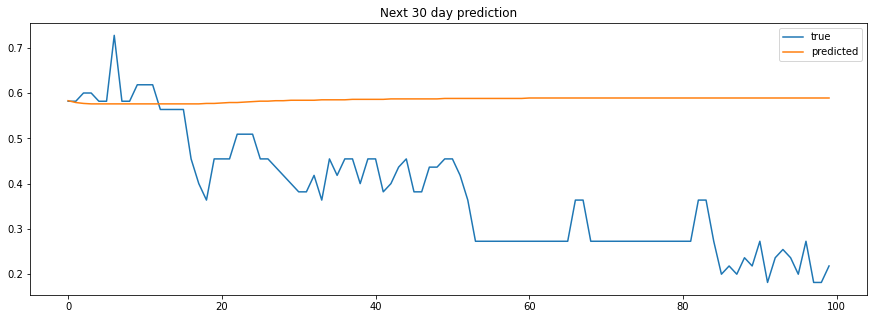

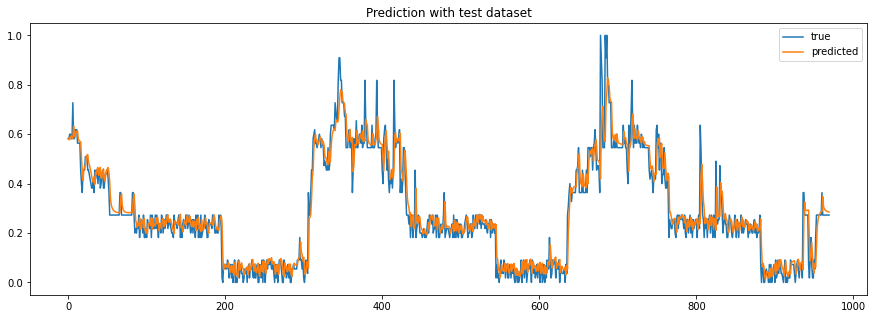

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.07 
Mean Absolute Error : 0.04 
R^2 Score : 0.89 


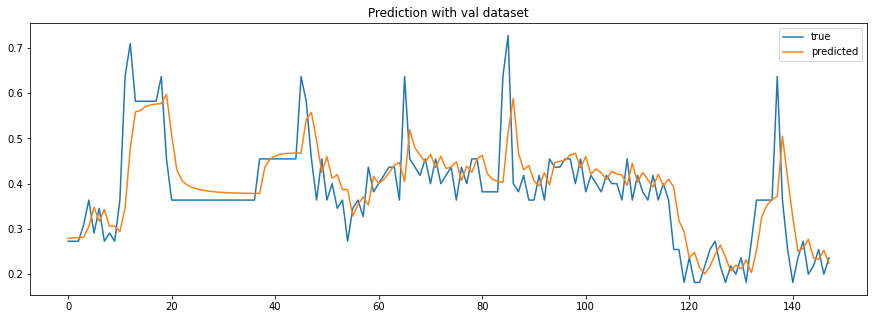

Mean Squared Error : 0.01 
Root Mean Squared Error : 0.07 
Mean Absolute Error : 0.05 
R^2 Score : 0.53 


In [8]:
for col_name in col_list:
    print(f"col_name : {col_name} \n")
    
    try:

        df = pd.read_csv("POMO_dataset/Historical Weather Data 2010-2021_preprocessed_2.csv")
        df1 = df[col_name]
        scaler = MinMaxScaler(feature_range=(0,1))
        df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
        df1 = pd.DataFrame(df1, columns=[col_name])

        train, test, val = df1.iloc[:3000], df1.iloc[3000:4000], df1.iloc[4000:]
        test = test.reset_index(drop=True)
        val = val.reset_index(drop=True)

        # choose a number of time steps
        n_steps = 30

        # split into samples
        X_train, y_train = split_sequence(train[col_name], n_steps)
        X_test, y_test = split_sequence(test[col_name], n_steps)
        X_val, y_val = split_sequence(val[col_name], n_steps)

        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
        X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

        # Vanilla LSTM for univariate time series forecasting
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # fit model
        history = model.fit(X_train, y_train, 
                            validation_data = (X_test, y_test), 
                            shuffle = False,
                            epochs = 50, 
                            verbose = 0)

        plt.figure(figsize=(15, 5))
        plt.plot(history.history['loss'][1:])
        plt.plot(history.history['val_loss'][1:])
        plt.title('Model Loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val']) # , loc='upper left'
        plt.savefig(f'model loss__{col_name.replace("/", " ")}.jpeg', bbox_inches='tight')
        plt.show()

        # Predicting For the next 30 data
        # demonstrate prediction for next 30 days
        x_input = np.array([X_test[0][i][0] for i in range(len(X_test[0]))])
        temp_input = list(x_input)
        lst_output = []
        i = 0
        next_days = 100
        while (i < next_days):
            if(len(temp_input)>n_steps):
                x_input = np.array(temp_input[1:])
                #print("{} day input {}".format(i,x_input))
                #print(x_input)
                x_input = x_input.reshape((1, n_steps, n_features))
                #print(x_input)
                yhat = model.predict(x_input, verbose=0)
                #print("{} day output {}".format(i,yhat))
#                 temp_input.append(yhat[0][0])
                temp_input.append(round(yhat[0][0],3))
                temp_input=temp_input[1:]
                #print(temp_input)
#                 lst_output.append(yhat[0][0])
                lst_output.append(round(yhat[0][0],3))
                i = i+1
            else:
                x_input = x_input.reshape((1, n_steps, n_features))
                yhat = model.predict(x_input, verbose=0)
                #print(yhat[0])
#                 temp_input.append(yhat[0][0])
#                 lst_output.append(yhat[0][0])
                temp_input.append(round(yhat[0][0],3))
                lst_output.append(round(yhat[0][0],3))
                i = i+1
        #print(lst_output)

        plt.figure(figsize=(15, 5))
        plt.plot(np.arange(0,next_days),y_test[:next_days])
        plt.plot(np.arange(0,next_days),lst_output)
        plt.title('Next 30 day prediction')
        plt.legend(['true', 'predicted']) # , loc='upper left'
        plt.savefig(f'Next 30 day prediction__{col_name.replace("/", " ")}.jpeg', bbox_inches='tight')
        plt.show()

        yhat = model.predict(X_test)
        plt.figure(figsize=(15, 5))
        plt.plot(np.arange(0,len(X_test)),y_test[:len(X_test)])
        plt.plot(np.arange(0,len(X_test)),yhat)
        plt.title('Prediction with test dataset')
        plt.legend(['true', 'predicted']) # , loc='upper left'
        plt.savefig(f'Prediction with test dataset__{col_name.replace("/", " ")}.jpeg', bbox_inches='tight')
        plt.show()

        evaluate_regression_model(y_test, yhat)

        yhat = model.predict(X_val)
        plt.figure(figsize=(15, 5))
        plt.plot(np.arange(0,len(X_val)),y_val)
        plt.plot(np.arange(0,len(X_val)),yhat)
        plt.title('Prediction with val dataset')
        plt.legend(['true', 'predicted']) # , loc='upper left'
        plt.savefig(f'Prediction with val dataset__{col_name.replace("/", " ")}.jpeg', bbox_inches='tight')
        plt.show()

        evaluate_regression_model(y_val, yhat)

        del df1
    
    except Exception as e:
        print(f"Error : {e}")
        pass